# Calculating the probability that medical staff will receive a reportable annual dose

In [30]:
import numpy as np
from scipy.stats import pareto,chisquare
import matplotlib.pyplot as plt

In [31]:
def compress(category):
    # Function to remove consecutive newlines from a file and return the values as a numpy array
    with open(category+'.txt') as dosefile:
        doses=dosefile.read()
    newdoses=''
    for i,v in enumerate(doses):
        if i+1<len(doses) and not (v=='\n' and doses[i+1]=='\n'):
            newdoses+=v
    return np.array([float(x) for x in newdoses.split('\n')])

Dosimetry data pulled from C:\Users\bnadal\PennO365\PROV-EHRS - EHRS-Radiation Safety\Therapies\_Dosimeter results for years 2018 through 2022

In [40]:
locations=('3S RN','3S Other','7S RN','7S Other','caregiver')#,'PavRN','PavOther')
data = {location:compress(location) for location in locations}

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html

The probability density function for pareto is:

$$f(x,b,loc,scale)=\frac{1}{scale}\frac{b}{(\frac{x-loc}{scale})^{b+1}}$$

I assumed the dosimetry distribution to be a power function (rather than exponential) due to apparent empirical properties of the data, like scale invariance.

In [38]:
def compare(data, location, show=False, print_out=True):
    # Function to compare dosimetry data to a Pareto distribution and calculate goodness of fit metrics
    b, loc, scale = pareto.fit(data) # find the best fit function
    x = np.linspace(1, int(max(data)), int(max(data)))
    y = pareto.pdf(x, b, loc=loc, scale=scale) # use the found parameters to build the PDF
    n, m, _ = plt.hist(data, bins='fd', density=True, label=f'dosimetry data') # plot the histogram and return the bins as (n, m)
    w = m[1] - m[0] # get the bin width
    m1 = m - w/2. # find the centers of the bins
    ey = pareto.pdf(m1[1:], b, loc=loc, scale=scale) # get the y values of the pdf at the centers of the bins
    if show:
        plt.plot(x[:200], y[:200], label=f'best fit Pareto function \n(b={b}, \nloc={loc}, \nscale={scale})')
        plt.plot(m1[1:], n) # plot the centers of the bins as a line
        plt.legend()
        plt.ylabel('probability density')
        plt.xlabel('dose (mRem)')
        plt.title(f'Dosimetry PDF for {location}')
        plt.show()
    else:
        plt.close()
    r2 = 1 - np.sum((ey - n)**2) / np.sum((ey - np.mean(ey))**2) # calculate R^2
    rmse = np.sqrt(np.sum((ey - n)**2) / len(n)) # calculate root mean square error
    p100 = pareto.sf(100, b, loc=loc, scale=scale) # calculate P(>100mR)
    p500 = pareto.sf(500, b, loc=loc, scale=scale) # calculate P(>500mR)
    p5000 = pareto.sf(5000, b, loc=loc, scale=scale) # calculate P(>5000mR)
    if print_out:
        print(f'RMSE={rmse}', f'\nP(>100 mR): {p100*100}%', f'\nP(>500 mR): {p500*100}%', f'\nP(>5000 mR): {p5000*100}%')
    return n, m, r2, rmse, p100, p500

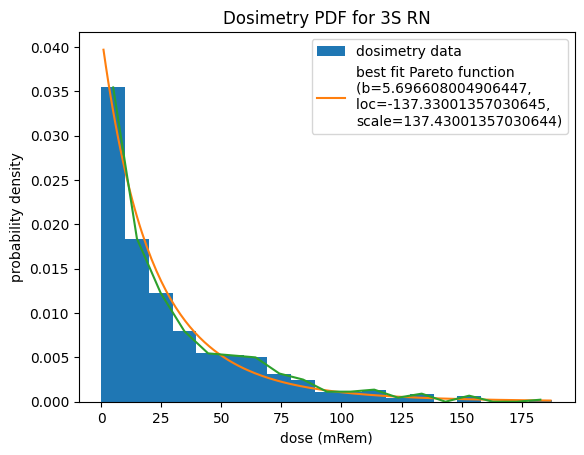

RMSE=0.0011321859958841737 
P(>100 mR): 4.449996778817135% 
P(>500 mR): 0.016012095527410706% 
P(>5000 mR): 1.0995018137112293e-07%


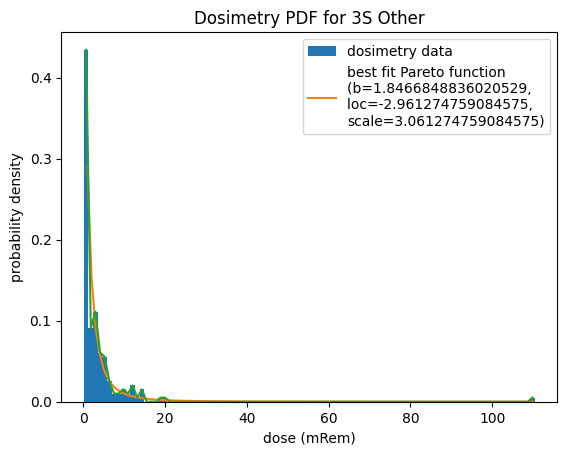

RMSE=0.010934947589722443 
P(>100 mR): 0.15154233165262174% 
P(>500 mR): 0.008098888865600187% 
P(>5000 mR): 0.00011641303429194843%


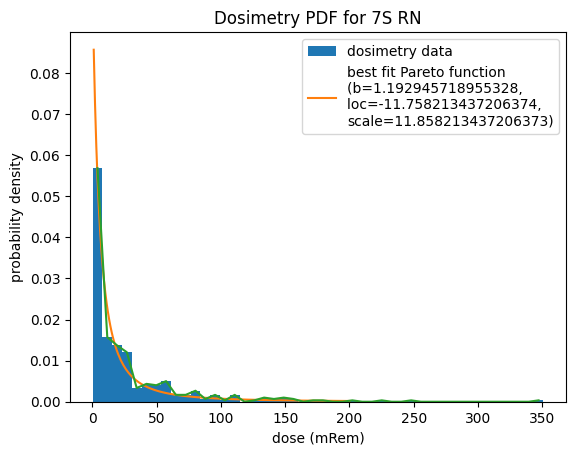

RMSE=0.00146242369424717 
P(>100 mR): 6.882725990325024% 
P(>500 mR): 1.1206742691638036% 
P(>5000 mR): 0.07368164597770999%


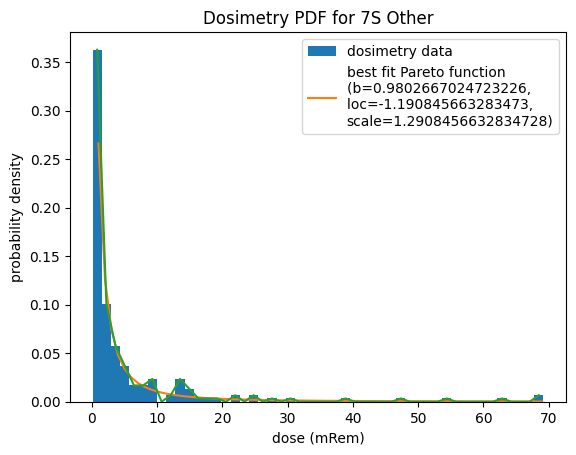

RMSE=0.007432694869056587 
P(>100 mR): 1.390315060034943% 
P(>500 mR): 0.2897098353169428% 
P(>5000 mR): 0.030381407724720307%


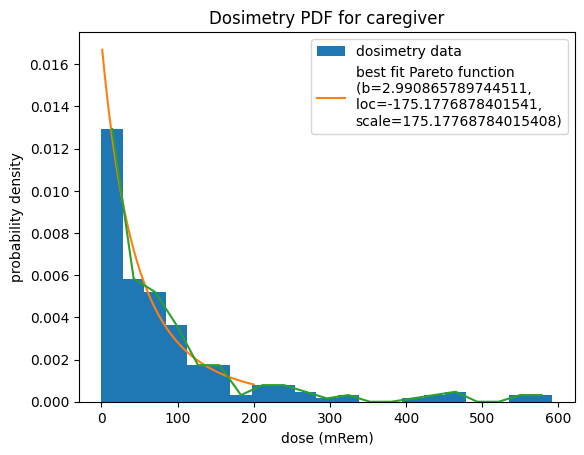

RMSE=0.0004538113668237849 
P(>100 mR): 25.905277623858048% 
P(>500 mR): 1.7682115217459486% 
P(>5000 mR): 0.004000294264815622%


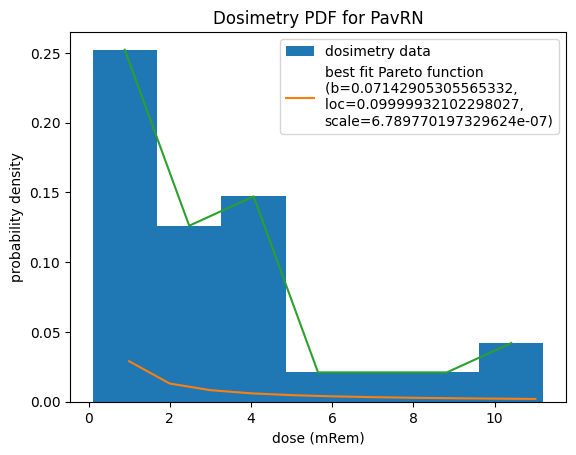

RMSE=0.10947493350727987 
P(>100 mR): 26.09685541184926% 
P(>500 mR): 23.261439244798492% 
P(>5000 mR): 19.73340115718575%


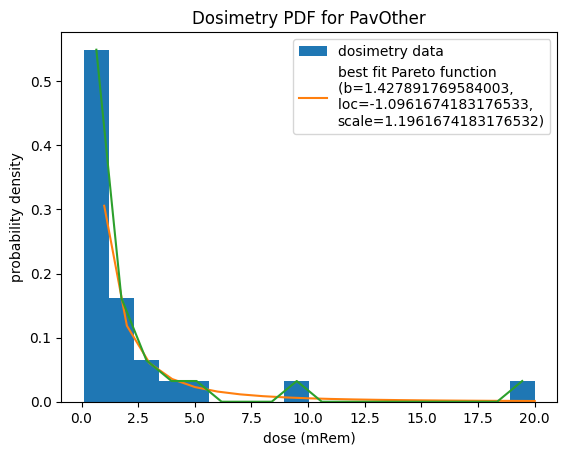

RMSE=0.021193311761357775 
P(>100 mR): 0.1772288198071782% 
P(>500 mR): 0.01802533819105185% 
P(>5000 mR): 0.0006748600960609227%


In [39]:
for location in data:
    compare(data[location],location,show=True)

## Results

| Category | P(>100 mR) | P(>500 mR) | P(>5000 mR) |
| --- | --- | --- | --- |
| 3S RN | 4.450%| 0.016% | 1.010&times;10<sup>-7</sup>% |
| 3S Other | 0.152% | 0.008% | 1.164&times;10<sup>-4</sup>% |
| 7S RN | 6.883% | 1.120% | 7.368&times;10<sup>-2</sup>% |
| 7S Other | 1.390% | 0.290% | 3.038&times;10<sup>-2</sup>% |
| caregiver | 25.905% | 1.768% | 4.000&times;10<sup>-3</sup>% |